# 1. 인공지능과 가위바위보 하기
- 이번시간에는 이미지를 분류하는 간단한 인공지능을 만들어 본다
- 숫자 손글씨 인식기를 만들어보자!
- 일반적으로 딥러닝 기술을 "데이터 준비 -> 딥러닝 네트워크 설계 -> 학습 -> 테스트(평가) " 순서대로 만든다

## 1.2 데이터 준비

### MNIST 숫자 손글씨 Dataset 불러들이기

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력

2.6.0
60000


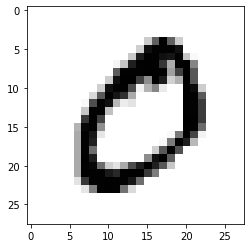

In [2]:
plt.imshow(x_train[1], cmap=plt.cm.binary)
plt.show()

In [3]:
print(y_train[1])

0


y항목에는 x항목에 들어있는 이미지에 대응하는 실제 숫자 값이 담겨있다

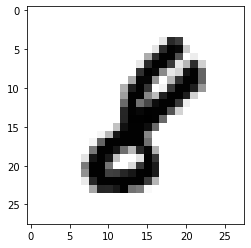

10002 번째 이미지의 숫자는 바로  8 입니다.


In [5]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=10001   
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

#### Matplotlib?
- 파이썬에서 제공하는 시각화 패키지.
- 차트,플롯등 다양한 형태로 데이터를 시각화할 수 있는 기능 제공

### 학습용 데이터와 시험용 데이터

In [6]:
print(x_train.shape)    # 28x28 크기의 숫자 이미지가 60,000장 있다

(60000, 28, 28)


In [7]:
print(x_test.shape)

(10000, 28, 28)


### 데이터 전처리 하기

In [8]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [9]:
# 0~1 사이의 값으로 정규화

x_train_norm, x_test_norm = x_train / 255.0, x_test/ 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


## 1.3 딥러닝 네트워크 설계하기

### Sequential Model을 사용
- 텐서플로우 케라스(tf.keras)에서 Sequential API라는 방법을 사용
-  Sequential API는 개발의 자유도는 많이 떨어지지만, 매우 간단하게 딥러닝 모델을 만들어낼 수 있는 방법

In [10]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


- Conv2D의 첫번째 인자 : 사용하는 이미지 특징의 수
- Dense레이어의 첫번째 인자 : 분류기에 사용되는 뉴런의 숫자, 이 값이 클수록 보다 복잡한 분류기를 만들 수 있다
- 마지막 Dense 레이어의 뉴런 숫자는 결과적으로 분류해 내야 하는 클래스 수

In [11]:
# 딥러닝 네트워크 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

## 1.4 딥러닝 네트워크 학습시키기
- 네트워크의 입력 (데이터갯수, 이미지 크기 x, 이미지 크기 y, 채널수)
- 채널수 1은 흑백이미지를 말한다. 컬러 이미지라면 R,G,B 세 가지 값이 있기 때문에 3

In [14]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [15]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)  

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2088 - accuracy: 0.9377
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0657 - accuracy: 0.9799
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0483 - accuracy: 0.9854
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0385 - accuracy: 0.9881
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0312 - accuracy: 0.9904
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0253 - accuracy: 0.9916
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0210 - accuracy: 0.9930
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0171 - accuracy: 0.9944
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0150 - accuracy: 0.9951
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.012

- epochs=10 : 전체 데이터를 10번 반복 사용해서 학습한다

## 1.5 얼마나 잘  만들었는지 확인하기

In [16]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 1s - loss: 0.0436 - accuracy: 0.9870
test_loss: 0.043615467846393585 
test_accuracy: 0.9869999885559082


### 어떤 데이터를 잘못 추론했는지 눈으로 확인
- model.evaluate() 대신 model.predict()를 사용하면 model이 입력값을 보고 실제로 추론한 확률분포를 출력할 수 있다.

In [17]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [2.9573397e-10 2.5272103e-08 1.2057927e-08 7.4267788e-08 1.9846660e-09
 7.4496865e-13 1.1169947e-14 9.9999988e-01 1.6335602e-09 3.2167293e-08]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


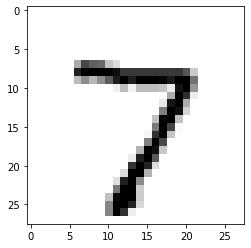

In [18]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [4.1305779e-05 1.9488789e-08 2.1054136e-07 6.2776798e-01 3.8010398e-06
 3.0160865e-01 1.5622176e-09 1.5452729e-08 5.7201536e-04 7.0006005e-02]
라벨: 9, 예측결과: 3


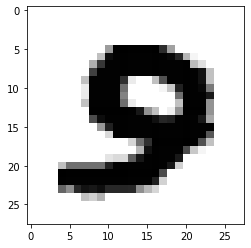

예측확률분포: [1.0810135e-05 1.0254706e-06 3.6262804e-06 2.8480384e-02 1.3756638e-05
 9.7148448e-01 8.8274135e-09 3.7835065e-07 7.0841972e-09 5.5759647e-06]
라벨: 3, 예측결과: 5


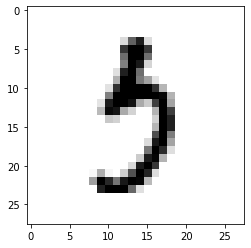

예측확률분포: [6.9864167e-05 1.1162430e-06 6.1529849e-05 5.2262406e-04 1.2097058e-03
 7.4576696e-05 5.5719028e-08 8.6790878e-01 3.5126588e-05 1.3011660e-01]
라벨: 9, 예측결과: 7


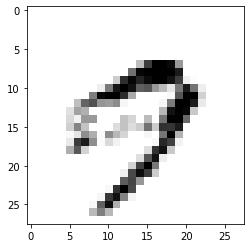

예측확률분포: [1.0235548e-11 2.4239142e-08 5.6338290e-10 9.9992406e-01 4.0433734e-16
 7.5670083e-05 5.5637712e-12 1.1435339e-11 2.4471166e-07 2.3087841e-09]
라벨: 5, 예측결과: 3


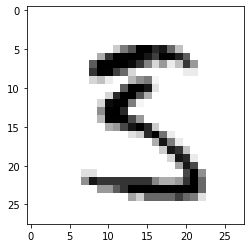

예측확률분포: [1.1032032e-04 1.9105239e-05 7.9126512e-05 9.8181239e-08 8.4771758e-01
 2.2755663e-03 5.0391920e-02 1.1252129e-08 8.2443538e-04 9.8581843e-02]
라벨: 9, 예측결과: 4


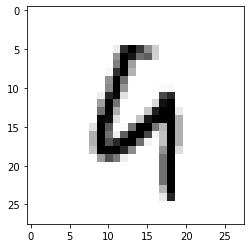

In [19]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## 1.6 더 좋은 네트워크 만들어 보기
- 딥러닝 네트워크의 구조 자체는 바꾸지 않으면서도 인식률을 높이는 방법
    - 하이퍼파라미터들을 바꾸어 본다!
    - Conv2D 레이어에서 입력 이미지의 특징 수를 늘리거나
    - Dense 레이어에서 뉴런수를 바꾸어 보거나
    - 학습 반복 횟수인 epoch 값을 변경

In [20]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=win0k&logNo=221603387293

- keras Sequential 모델
https://www.tensorflow.org/guide/keras/sequential_model?hl=ko